In [4]:
# 创建一个简单的 DataFrame，其中 OSS 路径需要替换为刚才词频统计输出的文件路径
url = "oss://word-counts/output/"
word_counts = spark.read.csv(url, header=False, sep="\t", inferSchema=True)
word_counts = word_counts.toDF("word", "count")

In [5]:
url = "oss://word-counts/stopwords.txt"
stopwords = spark.read.csv(url, header=False, inferSchema=True)
stopwords = stopwords.toDF("word")

### 过滤停用词，并限制高频词50个

In [6]:
# 执行查询逻辑
cleaned_data = word_counts.alias("wc") \
    .join(stopwords.alias("sw"), word_counts.word == stopwords['word'], how="left") \
    .filter(stopwords['word'].isNull()) \
    .select("wc.word", "wc.count")

# 按频率降序排序并限制为前50条记录
top_words = cleaned_data.orderBy("count", ascending=False).limit(50)

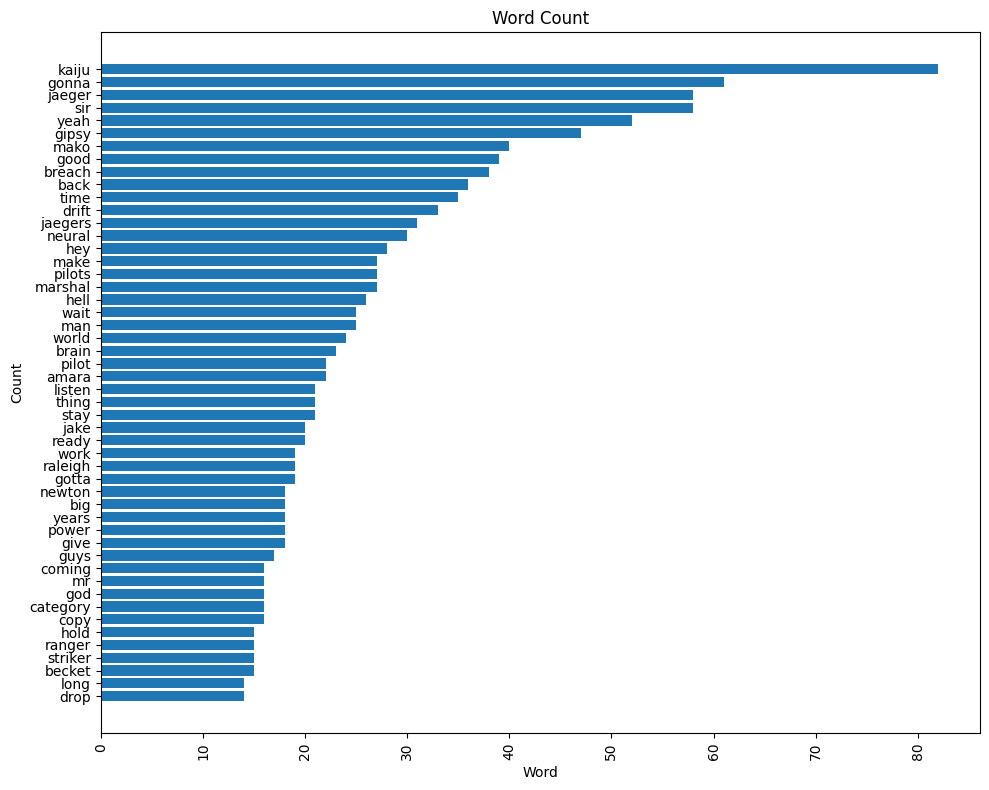

In [7]:
import matplotlib.pyplot as plt

# 将 DataFrame 转换为 Pandas DataFrame 以便于绘图
pandas_df = top_words.toPandas()

# 创建柱状图
plt.figure(figsize=(10, 8))
plt.barh(pandas_df['word'], pandas_df['count'])
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Count')
plt.xticks(rotation=90)
plt.tight_layout()

# 反转 Y 轴顺序
plt.gca().invert_yaxis()

# 显示图形
plt.show()